# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [5]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open Traffic_Signs.zip, Traffic_Signs.zip.zip or Traffic_Signs.zip.ZIP.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [3]:
!unzip '/content/drive/MyDrive/T5/task_week_4/Traffic_Signs.zip'

Streaming output truncated to the last 5000 lines.
 extracting: Traffic_Signs/Dataset/13/00013_00004_00022.png  
  inflating: Traffic_Signs/Dataset/13/00013_00021_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00003_00023.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00007.png  
 extracting: Traffic_Signs/Dataset/13/00013_00034_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00045_00013.png  
  inflating: Traffic_Signs/Dataset/13/00013_00068_00019.png  
 extracting: Traffic_Signs/Dataset/13/00013_00003_00004.png  
 extracting: Traffic_Signs/Dataset/13/00013_00017_00010.png  
 extracting: Traffic_Signs/Dataset/13/00013_00046_00003.png  
  inflating: Traffic_Signs/Dataset/13/00013_00057_00008.png  
 extracting: Traffic_Signs/Dataset/13/00013_00058_00011.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00017.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00013.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00006.png  
  inflating: Traffi

In [ ]:
!unzip '/content/drive/MyDrive/T5/task_week_4/Traffic_Signs.zip' -d '/content/drive/MyDrive/T5/task_week_4/Traffic_Signs/'

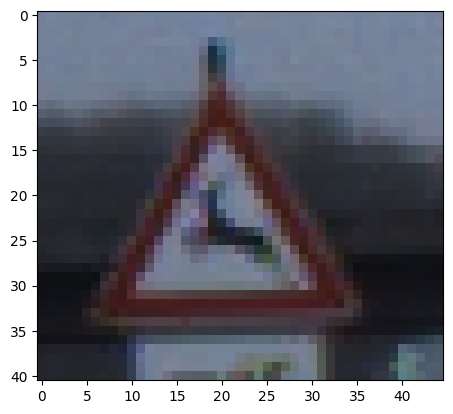

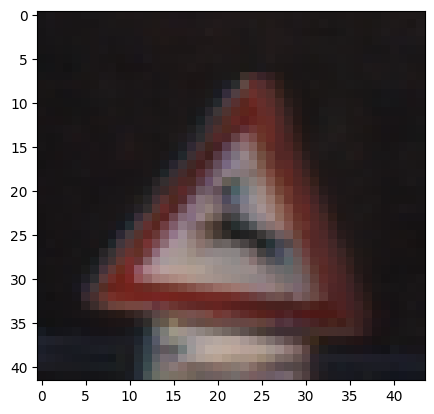

In [12]:
plt.imshow(plt.imread('Traffic_Signs/Dataset/31/00031_00000_00006.png'))
plt.show()
plt.imshow(plt.imread('Traffic_Signs/Dataset/31/00031_00005_00017.png'))
plt.show()

In [ ]:
import os
from PIL import Image

def resize_images(input_folder, output_folder, target_size=(32, 32)):

    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_folder, filename)
            image = Image.open(image_path)
            resized_image = image.resize(target_size)
            output_path = os.path.join(output_folder, filename)
            resized_image.save(output_path)

# Example usage:
input_folder = 'Traffic_Signs/Dataset/'
output_folder = '/content/drive/MyDrive/T5/task_week_4/resize_img'
resize_images(input_folder, output_folder)


In [4]:
import os
from PIL import Image
import logging

def resize_images(input_folder, output_folder, target_size=(32, 32)):

    os.makedirs(output_folder, exist_ok=True)
    logging.basicConfig(filename='resize_images.log', level=logging.INFO)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            try:
                image_path = os.path.join(input_folder, filename)
                image = Image.open(image_path)
                resized_image = image.resize(target_size)
                output_path = os.path.join(output_folder, filename)
                resized_image.save(output_path)
                logging.info(f'Successfully resized {filename}')
            except Exception as e:
                logging.error(f'Error processing {filename}: {e}')

# Example usage:
input_folder = '/content/drive/MyDrive/T5/task_week_4/Traffic_Signs/'
output_folder = '/content/drive/MyDrive/T5/task_week_4/resize_img'
resize_images(input_folder, output_folder)

In [5]:
from PIL import Image
import numpy as np

def normalize_image(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    normalized_image_array = image_array / 255.0
    return normalized_image_array

# Example usage:
image_path = 'Traffic_Signs/Dataset/31/00031_00021_00021.png'
normalized_image = normalize_image(image_path)
print(normalized_image)


[[[0.0627451  0.05882353 0.07843137]
  [0.05882353 0.05882353 0.07843137]
  [0.05490196 0.05882353 0.07843137]
  ...
  [0.05490196 0.05098039 0.06666667]
  [0.04705882 0.04705882 0.0627451 ]
  [0.04313725 0.04313725 0.0627451 ]]

 [[0.0627451  0.0627451  0.08235294]
  [0.05882353 0.05882353 0.07843137]
  [0.05882353 0.05882353 0.07843137]
  ...
  [0.05098039 0.05098039 0.06666667]
  [0.04313725 0.04313725 0.0627451 ]
  [0.04313725 0.04313725 0.0627451 ]]

 [[0.05490196 0.0627451  0.08235294]
  [0.05882353 0.05882353 0.07843137]
  [0.0627451  0.05882353 0.07843137]
  ...
  [0.04705882 0.04705882 0.0627451 ]
  [0.04313725 0.04313725 0.05882353]
  [0.03921569 0.04313725 0.0627451 ]]

 ...

 [[0.0627451  0.07058824 0.08627451]
  [0.0627451  0.06666667 0.08235294]
  [0.0627451  0.06666667 0.08235294]
  ...
  [0.07058824 0.08235294 0.10588235]
  [0.06666667 0.07843137 0.09803922]
  [0.05882353 0.07058824 0.09411765]]

 [[0.0627451  0.07843137 0.09411765]
  [0.06666667 0.0745098  0.08627451]


## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.model_selection import train_test_split

datagen = ImageDataGenerator(validation_split=0.15)

train_generator = datagen.flow_from_directory(
    'Traffic_Signs/Dataset/',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'Traffic_Signs/Dataset/',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

def load_data_from_generator(generator):
    data = []
    labels = []
    for _ in range(len(generator)):
        batch_data, batch_labels = next(generator)
        data.append(batch_data)
        labels.append(batch_labels)
    return np.concatenate(data), np.concatenate(labels)

val_data, val_labels = load_data_from_generator(validation_generator)

val_data, test_data, val_labels, test_labels = train_test_split(
    val_data, val_labels, test_size=0.5, random_state=42
)

print(f'Training set size: {train_generator.samples}')
print(f'Validation set size: {len(val_data)}')
print(f'Test set size: {len(test_data)}')

Found 33337 images belonging to 43 classes.
Found 5872 images belonging to 43 classes.
Training set size: 33337
Validation set size: 2936
Test set size: 2936


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layer with max-pooling
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example usage:
input_shape = (32, 32, 3)  # Adjust based on your image dimensions
num_classes = 43  # Adjust based on the number of classes in your dataset
model = create_cnn_model(input_shape, num_classes)
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [14]:
training_samples = 33337
validation_samples = 872
steps_per_epoch = training_samples // train_generator.batch_size
validation_steps = validation_samples // validation_generator.batch_size

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [16]:
history = model.fit(train_generator,epochs=10,steps_per_epoch=steps_per_epoch,validation_data=validation_generator,validation_steps=validation_steps)

Epoch 1/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.7932 - loss: 0.6812 - val_accuracy: 0.8866 - val_loss: 0.4400
Epoch 2/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.8750 - loss: 0.4016 - val_accuracy: 0.8900 - val_loss: 0.4714
Epoch 3/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8451 - loss: 0.5123 - val_accuracy: 0.8785 - val_loss: 0.5329
Epoch 4/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.9375 - loss: 0.2497 - val_accuracy: 0.8762 - val_loss: 0.5529
Epoch 5/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8696 - loss: 0.4486 - val_accuracy: 0.9062 - val_loss: 0.3952
Epoch 6/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.7188 - loss: 1.0649 - val_accuracy: 0.9167 - val_loss: 0.3610
Epoch 7/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.8874 - loss: 0.3993 - val_accuracy: 0.9230 - val_loss: 0.2694
Epoch 8/10
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.7500 -

In [17]:
model.save('my_model.h5')

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8823 - loss: 0.4561
Test Loss: 0.445461630821228
Test Accuracy: 0.8845368027687073


In [19]:
# Evaluate the model on the validation generator
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_steps)

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9003 - loss: 0.3752
Validation Loss: 0.3868570327758789
Validation Accuracy: 0.8900462985038757


## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [46]:
#https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
!gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
!unzip Test_Dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1S_vpQntND9839x8kJpegaEgtSIA4JxHO

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open Test_Dataset.zip, Test_Dataset.zip.zip or Test_Dataset.zip.ZIP.


In [21]:
!unzip '/content/drive/MyDrive/T5/task_week_4/Test_Dataset.zip' -d '/content/drive/MyDrive/T5/task_week_4/Test_Dataset/'

Streaming output truncated to the last 5000 lines.
 extracting: /content/drive/MyDrive/T5/task_week_4/Test_Dataset/Test_Dataset/Dataset/11536.png  
  inflating: /content/drive/MyDrive/T5/task_week_4/Test_Dataset/Test_Dataset/Dataset/02781.png  
  inflating: /content/drive/MyDrive/T5/task_week_4/Test_Dataset/Test_Dataset/Dataset/00009.png  
 extracting: /content/drive/MyDrive/T5/task_week_4/Test_Dataset/Test_Dataset/Dataset/10350.png  
 extracting: /content/drive/MyDrive/T5/task_week_4/Test_Dataset/Test_Dataset/Dataset/11484.png  
 extracting: /content/drive/MyDrive/T5/task_week_4/Test_Dataset/Test_Dataset/Dataset/01252.png  
 extracting: /content/drive/MyDrive/T5/task_week_4/Test_Dataset/Test_Dataset/Dataset/10960.png  
 extracting: /content/drive/MyDrive/T5/task_week_4/Test_Dataset/Test_Dataset/Dataset/02931.png  
 extracting: /content/drive/MyDrive/T5/task_week_4/Test_Dataset/Test_Dataset/Dataset/00390.png  
 extracting: /content/drive/MyDrive/T5/task_week_4/Test_Dataset/Test_Dataset

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

def preprocess_image(image_path):
    img = image.load_img('/content/drive/MyDrive/T5/task_week_4/Test_Dataset/Test_Dataset/Dataset/02321.png', target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Example usage:
import os
import numpy as np

test_images_dir = '/content/drive/MyDrive/T5/task_week_4/Test_Dataset/'
for image_name in os.listdir(test_images_dir):
    image_path = os.path.join(test_images_dir, image_name)
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    print(f'Prediction for {image_name}: {np.argmax(prediction)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
Prediction for Test_Dataset: 38


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

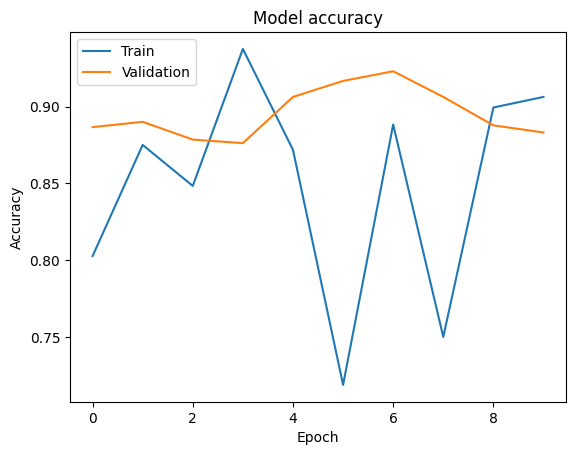

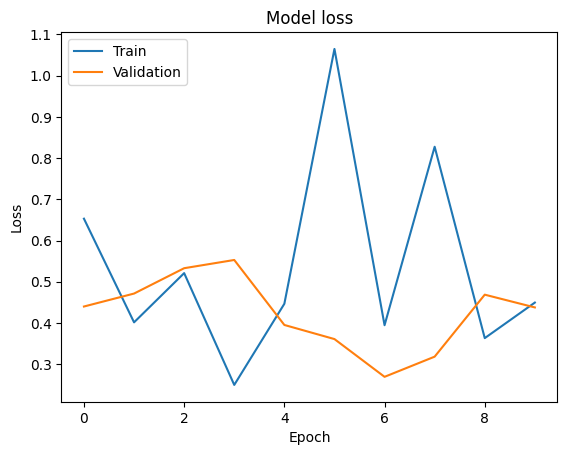

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [27]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:


**Data Preprocessing:**
- **Techniques:** Resizing images, normalization, data augmentation.
- **Improvement:** Ensures uniform input size, scales pixel values for stable training, and increases dataset diversity to enhance model robustness.

**Model Architecture:**
- **Structure:** Multiple convolutional layers, varying kernel sizes, pooling layers.
- **Reason:** Convolutional layers extract features, pooling layers reduce dimensionality and computational load.

**Activation Functions:**
- **Choice:** ReLU.
- **Influence:** Introduces non-linearity, helps model learn complex patterns, and mitigates vanishing gradient problem.

**Training Process:**
- **Epochs:** 10.
- **Optimizer:** Adam.
- **Impact:** Balances training speed and stability, ensures thorough learning, and accelerates convergence.

**Loss Function and Metrics:**
- **Choice:** Categorical Cross-Entropy, Accuracy.
- **Alignment:** Measures prediction error and classification performance, crucial for multi-class tasks like traffic sign recognition.

**Regularization Techniques:**
- **Methods:** Dropout, Batch Normalization.
- **Benefit:** Prevents overfitting by randomly dropping neurons and stabilizes learning by normalizing activations.

**Model Evaluation:**
- **Method:** Confusion matrix, accuracy, precision, recall.
- **Reason:** Provides detailed performance insights, highlights model's ability to generalize.

**Model Visualization:**
- **Significance:** Accuracy and loss curves.
- **Insight:** Tracks training progress, identifies overfitting/underfitting, and guides hyperparameter tuning.

**Overfitting and Underfitting:**
- **Analysis:** Monitor validation performance.
- **Strategies:** Use regularization, data augmentation, and adjust model complexity.
